# import module

In [1]:
import easyocr
from matplotlib import pyplot as plt
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image

#from imutils.perspective import four_point_transform
#from imutils.contours import sort_contours
#import imutils

# set variable

In [2]:
imgPath = 'testImg13.jpg'

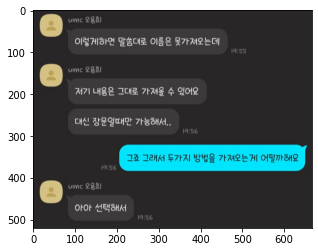

In [3]:
img = cv2.imread(imgPath)
plt.imshow(img)

In [4]:
img = cv2.imread(imgPath)
print("img.shape = {0}".format(img.shape))



#resize_img = cv2.resize(img, (700, 1400))
#print("resize_img.shape = {0}".format(resize_img.shape))
#plt.imshow(resize_img)

img.shape = (520, 666, 3)


# square box

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


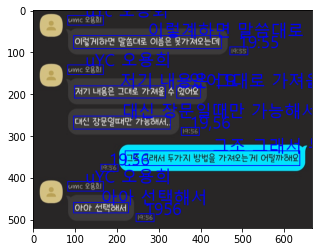

In [5]:
reader = easyocr.Reader(['ko', 'en'])
result =  reader.readtext(imgPath)

img = cv2.imread(imgPath)

imgarr = Image.fromarray(img)
font = ImageFont.truetype("malgun.ttf", 40)
draw = ImageDraw.Draw(imgarr)

for i in result:
  x = i[0][0][0]
  y = i[0][0][1]
  w = i[0][1][0] - i[0][0][0]
  h = i[0][2][1] - i[0][1][1]

  draw.rectangle(((x, y), (x+w, y+h)), outline="blue", width=2)
  draw.text((int((x+x+w)/2), y-40), str(i[1]), font=font, fill="blue")

plt.imshow(imgarr)
plt.show()

# check float

In [6]:
def check_float(element):
    partition = element.partition('.')
    
    if element.isdigit():
        newelement = float(element)
        return True

    elif (partition[0].isdigit() and partition[1] == '.' and partition[2].isdigit()) or (partition[0] == '' and partition[1] == '.' and partition[2].isdigit()) or (partition[0].isdigit() and partition[1] == '.' and partition[2] == ''):
            newelement = float(element)
            return True
    else:
        return False

check_float('234.34')

True

In [36]:
reader = easyocr.Reader(['ko'])
result = reader.readtext(imgPath)
print(result)
for i in range(len(result)):
    print(result[i][1])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[34, 8], [144, 8], [144, 38], [34, 38]], '* 18.70', 0.34151367130875604), ([[180, 8], [248, 8], [248, 38], [180, 38]], '% 좀', 0.08801861348578892), ([[540, 8], [648, 8], [648, 36], [540, 36]], '[미 111 82%', 0.0180042303967107), ([[89, 67], [277, 67], [277, 109], [89, 109]], '승찬용 수경님', 0.9776836655964014), ([[433, 156], [677, 156], [677, 193], [433, 193]], '그럼 구디단으로 갈게', 0.8800954848546975), ([[580, 230], [676, 230], [676, 262], [580, 262]], '7시까지', 0.9994861483573914), ([[508, 254], [562, 254], [562, 278], [508, 278]], '19.23', 0.8596535447890485), ([[80, 298], [214, 298], [214, 330], [80, 330]], '승찬용 수경님', 0.7547565023622755), ([[102, 352], [200, 352], [200, 376], [102, 376]], '0키0=', 0.1820100098848343), ([[101, 419], [264, 419], [264, 455], [101, 455]], '더 일찍도 구스', 0.3497109316601596), ([[286, 446], [338, 446], [338, 470], [286, 470]], '19.37', 0.6323215261288089), ([[345, 503], [673, 503], [673, 539], [345, 539]], '용성이 시간덩에 벌 보고 77', 0.2313811696720461), ([[216, 528], [270, 528]

# extract text  all capture

In [34]:
reader = easyocr.Reader(['ko'])
result = reader.readtext(imgPath)

l= []
name = None
s = ""
flag = False

for i in range(len(result)):
    if flag == False and result[i][0][0][0]/img.shape[1] > 80/700 and result[i][0][0][0]/img.shape[1] < 100/700 and result[i][0][0][1]/img.shape[0] > 60/1500 and result[i][0][0][1]/img.shape[0] < 80 / 1500 :
        name = result[i][1]
        flag = True
        continue
    elif name ==  result[i][1]:
        l = result[i:]
        break
for i in range(len(l)) :
    if l[i][1] == name or check_float(l[i][1]) :
        continue

    s +=  l[i][1]


print(name)
print(s)




CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


승찬용 수경님
0키0=더 일찍도 구스용성이 시간덩에 벌 보고 770키0=당산에서 온대당산그럼 벌 구디에서 보자구 ~남도에서 오지?편굉 제대로 하고가야켓다딱 대#


# extract text  your capture

In [37]:
reader = easyocr.Reader(['ko'])
result = reader.readtext(imgPath)

l= []
name = None
s = ""
flag = False

for i in range(len(result)):
    if flag == False and result[i][0][0][0]/img.shape[1] > 80/700 and result[i][0][0][0]/img.shape[1] < 100/700 and result[i][0][0][1]/img.shape[0] > 60/1500 and result[i][0][0][1]/img.shape[0] < 80 / 1500 :
        name = result[i][1]
        flag = True
        continue
    elif name ==  result[i][1]:
        l = result[i:]
        break
for i in range(len(l)) :
    if l[i][1] == name or check_float(l[i][1]) or     l[i][0][1][0]/img.shape[1] > 650/700  :
        continue

    s +=  l[i][1]


print(name)
print(s)




CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


승찬용 수경님
0키0=더 일찍도 구스0키0=당산에서 온대그럼 벌 구디에서 보자구 ~남도에서 오지?딱 대


#  extract text  my last 

In [38]:
reader = easyocr.Reader(['ko'])
result = reader.readtext(imgPath)

l= []
name = None
s = ""
flag = False

for i in range(len(result)):
    if flag == False and result[i][0][0][0]/img.shape[1] > 80/700 and result[i][0][0][0]/img.shape[1] < 100/700 and result[i][0][0][1]/img.shape[0] > 60/1500 and result[i][0][0][1]/img.shape[0] < 80 / 1500 :
        name = result[i][1]
        flag = True
        continue
    elif name ==  result[i][1]:
        l = result[i:]
        
for i in range(len(l)) :
    if l[i][1] == name or check_float(l[i][1]) :
        continue

    s +=  l[i][1]


print(name)
print(s)




CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


승찬용 수경님
딱 대#


#  extract text  cut capture

In [19]:
reader = easyocr.Reader(['ko'])
result = reader.readtext(imgPath)
#print(result)
#for i in range(len(result)):
#    print(result[i][1])



name = None
s = ""


name = result[0][1]

for i in range(1,len(result)-2):
    if result[i][1]==name or check_float(l[i][1]) :
        continue
    s +=result[i][1]


print(name)
print(s)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


강은서
잠만요잠만요잠만요잠만요잠만요포잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요!잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요포잠만요잠만요'잠만요잠만요잠만요잠만요잠만요포잠만요잠만요잠만요잠만요잠만요'잠만요잠만요잠만요잠만외잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요포잠만요잠만요잠만요잠만요잠만요잠만요잠만요!포잠만요잠만요잠만요잠만요잠만요'잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요포잠만요잠만요잠만요잠만요잠만요잠만요잠만요포잠만요잠만요잠만요잠만요잠만요!잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요잠만요포잠만요잠만요'잠만요잠만요잠만요


# extract all cut capture 

In [11]:
reader = easyocr.Reader(['ko','en'])
result = reader.readtext(imgPath)
#print(result)
#for i in range(len(result)):
#    print(result[i][1])



name = None
mys = ""
yours = ""

name = result[0][1]


for i in range(1,len(result)-2):
    if result[i][1]==name or check_float(result[i][1])   :
        continue
    elif  result[i][0][1][0]/img.shape[1] > 650/700 :
        mys+=result[i][1]
    else:
        yours +=result[i][1]


print(name)
print(yours)
print(mys)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\dhdyd\Anaconda3\envs\ocr\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


uYc 오용회
이렇계하면 말씀대로 이름은 못가져오는데19:55uYC 오용희저기 내용은 그대로 가져올있어요대신 장문일때만 가능해서19,56uYC 오용희
그조 그래서 두가지 방법올 가져오는게 어떻까해요


In [32]:
a = '132.1'
print(a.isnumeric())

False
